In [3]:
#imports
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [1]:
color = ('b','g','r')
def cal_hist(image): 
    for i,col in enumerate(color):
            image_hsv = cv2.cvtColor(image, 3)
            histr = cv2.calcHist([image_hsv],[i],None,[256],[0,256])
    return histr


In [5]:
img = cv2.imread("data_test/a.jpg")

# create sub images
img_map = img[0:600, 0:600]
img_legend = img[600:705, 0:600]

#show images - to save the images, uncomment the lines below.
cv2.imshow( img_map)
cv2.imshow( img_legend)
# cv2.imwrite('map_only.png',img_map)
# cv2.imwrite('legend_only.png',img_legend)
cv2.waitKey(0)
cv2.destroyAllWindows()  

error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:1000: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [3]:

images = []
flat_data = []
target = []
#images to be classified as:
# labesls : Mer= 0 and Ailleurs = 1
categories = ["Mer","Ailleurs"]


for c in categories:
    print("categorie is : ",c,"\t label is ", categories.index(c))
    target_class = categories.index(c)
    images_path = os.path.join("./Data",c)
    for img in os.listdir(images_path):
        image = cv2.imread(os.path.join(images_path, img), cv2.COLOR_BGR2GRAY )  
        resized_image = cv2.resize(image, (500,500), interpolation = cv2.INTER_AREA)
        images.append(resized_image)
        flat_data.append(cal_hist(resized_image).flatten())
        target.append(target_class)

flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

df2 = pd.DataFrame(flat_data)
df2['Class'] = target

x = df2.iloc[:,:-1].values
y = target




categorie is :  Mer 	 label is  0
categorie is :  Ailleurs 	 label is  1


In [4]:
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)



classifieur = make_pipeline(StandardScaler(),SVC(gamma=0.001,kernel='rbf')) 
# Stratify ensures every image is divided in equal proportions (no bias)
def baseline(random_state):
    x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=random_state,stratify=y)  
    """print("Dimensions of input training data:",x_train.shape)
    print("Dimensions of input testing data:",x_test.shape)
    print("Dimensions of output training data:",y_train.shape)
    print("Dimensions of output testing data:",y_train.shape)"""
    classifieur.fit(x_train,y_train)

    y_predits = classifieur.predict(x_test)
    #print("Les vraies classes :")
    #print(y_test)
    #print("Les classes prédites :")
    #print(y_predits)
    #print("\n ---> the Accuracy is : ")
    #accuracy_score(y_test,y_predits)
    return x_train,x_test,y_train,y_test,accuracy_score(y_test,y_predits)


Input data dimensions: (414, 256)
Output data dimensions: (414,)


In [5]:
for i in range(1,13):
    x_train,x_test,y_train,y_test,accuracy= baseline(i)
    f = open('scoresSVM.txt','a+')
    f.write(str(accuracy)+"\n")

In [6]:
df2

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Class
0,351.0,56.0,57.0,88.0,94.0,90.0,96.0,131.0,118.0,121.0,...,6324.0,5494.0,5305.0,4363.0,4608.0,3984.0,4353.0,3982.0,3676.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,583.0,569.0,577.0,588.0,545.0,410.0,944.0,583.0,1970.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,76.0,75.0,46.0,37.0,19.0,11.0,8.0,1.0,4.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,2.0,4.0,1.0,2.0,5.0,5.0,8.0,13.0,...,1.0,8.0,9.0,7.0,15.0,28.0,9.0,18.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,3017.0,862.0,856.0,914.0,1011.0,1076.0,1198.0,1236.0,1406.0,1591.0,...,48.0,37.0,29.0,35.0,32.0,25.0,28.0,24.0,94.0,1
410,2.0,0.0,0.0,0.0,2.0,15.0,7.0,12.0,13.0,12.0,...,408.0,613.0,1023.0,1415.0,2253.0,5242.0,10585.0,18022.0,43809.0,1
411,28.0,6.0,4.0,13.0,14.0,11.0,15.0,18.0,27.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
412,202.0,344.0,401.0,557.0,676.0,737.0,920.0,1064.0,1155.0,1197.0,...,187.0,196.0,154.0,163.0,174.0,175.0,167.0,202.0,267.0,1


In [7]:
f = open("scoresSVM.txt", "r")
listItems = f.read().splitlines()
scores = [float(i) for i in listItems]
standard_deviation = np.std(scores)
print("l'écart type est  : ",standard_deviation)
print("Le meilleur scores est  : ",np.max(scores))

l'écart type est  :  0.024504562840418104
Le meilleur scores est  :  0.816


### Rapport de Classification 

In [8]:
#classification report
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test,accuracy= baseline(8)
y_true= y_test
y_predits = classifieur.predict(x_test)
y_predicted = y_predits
target_names = ["Mer: '0' ", "Ailleurs: '1'"]
print(classification_report(y_true, y_predicted, target_names= target_names))

               precision    recall  f1-score   support

    Mer: '0'        0.82      0.81      0.81        62
Ailleurs: '1'       0.81      0.83      0.82        63

     accuracy                           0.82       125
    macro avg       0.82      0.82      0.82       125
 weighted avg       0.82      0.82      0.82       125



### Sauvegarde du model en utilisant 'pickle'

In [9]:
import pickle

pickle.dump(classifieur, open("image_classifier_SVM.py","wb"))

test_model_SVM = pickle.load(open("image_classifier_SVM.py","rb"))


### testing a new image : not in out data set

Prediction : Ailleurs , label :  1


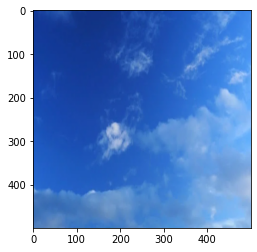

In [10]:
flat_data = []
img_array = plt.imread('data_test/blueSky.webp')
# Resize image
img_resized = cv2.resize(img_array, (500,500), interpolation = cv2.INTER_AREA)
flat_data.append(cal_hist(img_resized).flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
#print("data = ",flat_data)

y_output = test_model_SVM.predict(flat_data)
y_output_name = categories[y_output[0]]

print("Prediction :",y_output_name, ", label : ",y_output[0])

Vrais classes 
[1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 1]
classes prédites : 
[0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 0 1 1]
taux de bonne classification : 
0.7317073170731707


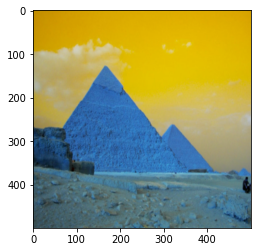

In [12]:

files_array = os.listdir("AllTest")[0:]
def compute_labels(rep):
    labels = []
   # dico_labels = {}
    for filename in rep:
        # Mer
        y = 0
        if (int(filename[0]) == 0):
            # Ailleurs
            y = 1
        labels.append(y)
        #dico_labels[filename] = y
    return(np.array(labels))
    #return(dico_labels)

 
y_test = compute_labels(files_array)
y_out = []

for filename in files_array:
    y_out.append(predict_image(filename))


y_out = np.array(y_out)

print("Vrais classes ")
print(y_test)

print("classes prédites : ")
print(y_out)


print("taux de bonne classification : ")
print(accuracy_score(y_test,y_out))

 

In [11]:

def predict_image(filename):
    flat_data = []
    img_array = cv2.imread('AllTest/'+str(filename),cv2.COLOR_BGR2GRAY)
    # Resize image
    img_resized = cv2.resize(img_array, (500,500), interpolation = cv2.INTER_AREA)
    flat_data.append(cal_hist(img_resized).flatten())
    flat_data = np.array(flat_data)
    plt.imshow(img_resized)
   
    y_output = test_model_SVM.predict(flat_data)
    return y_output[0]



1spme.jpg


0

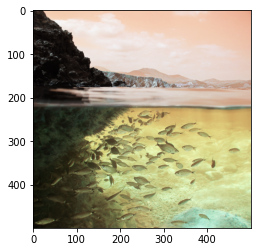

In [13]:
print(files_array[2])
predict_image(files_array[2])